In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import numpy as np
from tqdm.auto import tqdm

tqdm.pandas()

/home/teemu/.local/share/virtualenvs/ml-experiments--Ocnvtwy/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
def f1_(p, r):
    multiple = p*r
    summed = p+r
    #print(f"f1: {multiple},{summed}")
    div = multiple/summed
    #print(f"f1: {div}")
    return 2*div

In [3]:
def f1(p, r):
    if p == 0 or r == 0:
        return np.nan
    return 2*((p*r)/(p+r))

In [4]:
f1(0.5,1.0)

0.6666666666666666

In [5]:
values = [(round(x,2), 1.0, round(f1(x, 1.0), 5), round(f1(x, 1.0)-x, 5)) for x in np.arange(0.1, 1.1, 0.1)]
pd.DataFrame(columns=["Precision", "Recall", "F1-Score", "Difference"], data=values)

,Precision,Recall,F1-Score,Difference
0,0.1,1.0,0.18182,0.08182
1,0.2,1.0,0.33333,0.13333
2,0.3,1.0,0.46154,0.16154
3,0.4,1.0,0.57143,0.17143
4,0.5,1.0,0.66667,0.16667
5,0.6,1.0,0.75000,0.15000
6,0.7,1.0,0.82353,0.12353
7,0.8,1.0,0.88889,0.08889
8,0.9,1.0,0.94737,0.04737
9,1.0,1.0,1.00000,0.00000


In [6]:
[(round(x,2), round(f1(x, 1.0)-x, 5)) for x in np.arange(0.1, 1.1, 0.1)]

[(0.1, 0.08182),
 (0.2, 0.13333),
 (0.3, 0.16154),
 (0.4, 0.17143),
 (0.5, 0.16667),
 (0.6, 0.15),
 (0.7, 0.12353),
 (0.8, 0.08889),
 (0.9, 0.04737),
 (1.0, 0.0)]

In [7]:
import numpy as np

precisions = []
recalls = []

In [8]:
for i in np.arange(0.01, 1.0, 0.01):
    precisions.append(i)
precisions.append(1.0)

In [9]:
for i in np.arange(0.01, 1.0, 0.01):
    recalls.append(i)
recalls.append(1.0)

In [10]:
print([round(x, 2) for x in precisions])

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


In [11]:
max(precisions)

1.0

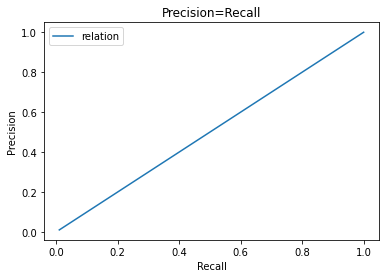

In [12]:
plt.plot(recalls, precisions) #params are (x,y) 
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.legend(("relation",), loc='best')
plt.title("Precision=Recall")
plt.show()

In [13]:
f1_scores = []
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(p,r))

In [14]:
def plot_scores(x_label, y_label, x, y, title, print_max_y=False, print_max_x=False, draw_diagonal=False, legend1="F1 Score"):
    np_x = np.array(x)
    np_y = np.array(y)
    np_diff = np_y-np_x
    max_idx = np.argmax(np_diff)
    #print(np_diff)
    #print(f"max idx={max_idx}, ={y[max_idx]}")
    #plt.plot((x[max_idx], x[max_idx]), (0, y[max_idx]), 'r-')
    if draw_diagonal:
        plt.plot((0,1), (0,1), 'b--')
    text_x = round(x[max_idx], 2)
    text_y = round(y[max_idx], 2)
    if print_max_x:
        plt.axvline(x=x[max_idx],color='red')
        plt.text(x[max_idx], 1, f"{text_x}={text_y}", ha='left', va='top', color="red")
    max_idx = np.argmax(y)
    text_max = round(y[max_idx], 2)
    if print_max_y:
        plt.text(1, y[max_idx], f"max={text_max}", ha='left', va='top', color="red")
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend((legend1, "Max Gap", "F1 Score",), loc='best')
    plt.show()


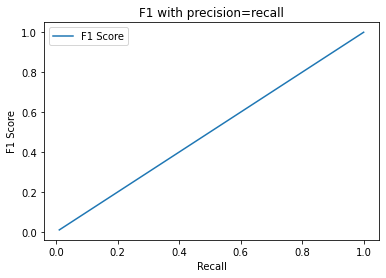

In [15]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=recall")

In [16]:
values = [(round(x,2), round(x,2), round(f1(x, x), 5), round(f1(x, x)-x, 5)) for x in np.arange(0.1, 1.1, 0.1)]
pd.DataFrame(columns=["Precision", "Recall", "F1-Score", "Difference"], data=values)

,Precision,Recall,F1-Score,Difference
0,0.1,0.1,0.1,0.0
1,0.2,0.2,0.2,0.0
2,0.3,0.3,0.3,0.0
3,0.4,0.4,0.4,0.0
4,0.5,0.5,0.5,0.0
5,0.6,0.6,0.6,0.0
6,0.7,0.7,0.7,0.0
7,0.8,0.8,0.8,0.0
8,0.9,0.9,0.9,0.0
9,1.0,1.0,1.0,0.0


In [17]:
f1_scores = []
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(p,1))

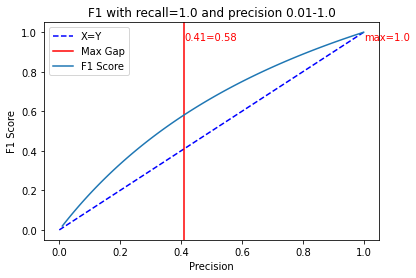

In [18]:
plot_scores("Precision", "F1 Score", precisions, f1_scores, "F1 with recall=1.0 and precision 0.01-1.0", print_max_x=True, print_max_y=True, draw_diagonal=True, legend1="X=Y")

In [19]:
f1_scores = []
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(1, r))

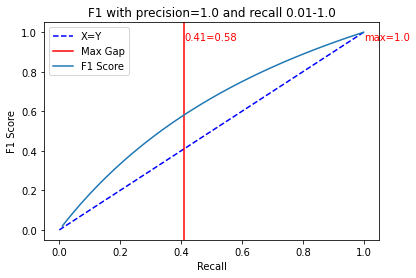

In [20]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=1.0 and recall 0.01-1.0", print_max_x=True, print_max_y=True, draw_diagonal=True, legend1="X=Y")

In [21]:
f1_scores = []
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(1,r))

In [22]:
values = [(1.0, round(x,2), round(f1(1.0, x), 5), round(f1(1.0, x)-x, 5)) for x in np.arange(0.1, 1.1, 0.1)]
pd.DataFrame(columns=["Precision", "Recall", "F1-Score", "Difference"], data=values)

,Precision,Recall,F1-Score,Difference
0,1.0,0.1,0.18182,0.08182
1,1.0,0.2,0.33333,0.13333
2,1.0,0.3,0.46154,0.16154
3,1.0,0.4,0.57143,0.17143
4,1.0,0.5,0.66667,0.16667
5,1.0,0.6,0.75000,0.15000
6,1.0,0.7,0.82353,0.12353
7,1.0,0.8,0.88889,0.08889
8,1.0,0.9,0.94737,0.04737
9,1.0,1.0,1.00000,0.00000


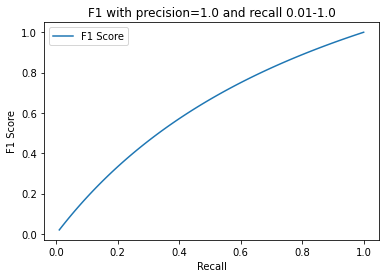

In [23]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=1.0 and recall 0.01-1.0")

In [24]:
f1_scores = []
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(0.8,r))

In [25]:
values = [(0.8, round(x,2), round(f1(0.8, x), 5), round(f1(0.8, x)-x, 5)) for x in np.arange(0.1, 1.1, 0.1)]
pd.DataFrame(columns=["Precision", "Recall", "F1-Score", "Difference"], data=values)

,Precision,Recall,F1-Score,Difference
0,0.8,0.1,0.17778,0.07778
1,0.8,0.2,0.32000,0.12000
2,0.8,0.3,0.43636,0.13636
3,0.8,0.4,0.53333,0.13333
4,0.8,0.5,0.61538,0.11538
5,0.8,0.6,0.68571,0.08571
6,0.8,0.7,0.74667,0.04667
7,0.8,0.8,0.80000,0.00000
8,0.8,0.9,0.84706,-0.05294
9,0.8,1.0,0.88889,-0.11111


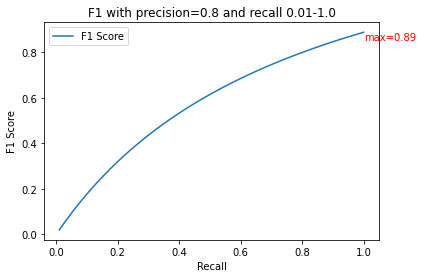

In [26]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=0.8 and recall 0.01-1.0", print_max_y=True)

In [27]:
max(f1_scores)

0.888888888888889

In [28]:
f1_scores = []
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(0.1,r))

In [29]:
values = [(0.1, round(x,2), round(f1(0.1, x), 5), round(f1(0.1, x)-x, 5)) for x in np.arange(0.1, 1.1, 0.1)]
pd.DataFrame(columns=["Precision", "Recall", "F1-Score", "Difference"], data=values)

,Precision,Recall,F1-Score,Difference
0,0.1,0.1,0.10000,0.00000
1,0.1,0.2,0.13333,-0.06667
2,0.1,0.3,0.15000,-0.15000
3,0.1,0.4,0.16000,-0.24000
4,0.1,0.5,0.16667,-0.33333
5,0.1,0.6,0.17143,-0.42857
6,0.1,0.7,0.17500,-0.52500
7,0.1,0.8,0.17778,-0.62222
8,0.1,0.9,0.18000,-0.72000
9,0.1,1.0,0.18182,-0.81818


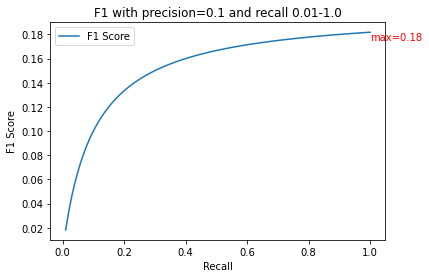

In [30]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=0.1 and recall 0.01-1.0", print_max_y=True)

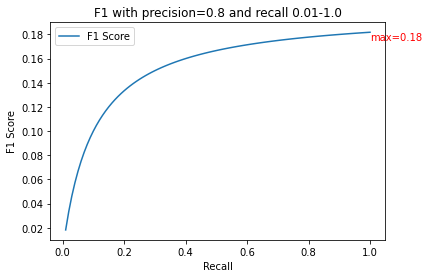

In [31]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=0.8 and recall 0.01-1.0", print_max_y=True)

In [32]:
max(f1_scores)

0.18181818181818182

In [33]:
f1_scores = []
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(0.1,r))

In [34]:
values = [(0.1, round(x,2), round(f1(0.1, x), 5), round(f1(0.1, x)-x, 5)) for x in np.arange(0.1, 1.1, 0.1)]
pd.DataFrame(columns=["Precision", "Recall", "F1-Score", "Difference"], data=values)

,Precision,Recall,F1-Score,Difference
0,0.1,0.1,0.10000,0.00000
1,0.1,0.2,0.13333,-0.06667
2,0.1,0.3,0.15000,-0.15000
3,0.1,0.4,0.16000,-0.24000
4,0.1,0.5,0.16667,-0.33333
5,0.1,0.6,0.17143,-0.42857
6,0.1,0.7,0.17500,-0.52500
7,0.1,0.8,0.17778,-0.62222
8,0.1,0.9,0.18000,-0.72000
9,0.1,1.0,0.18182,-0.81818


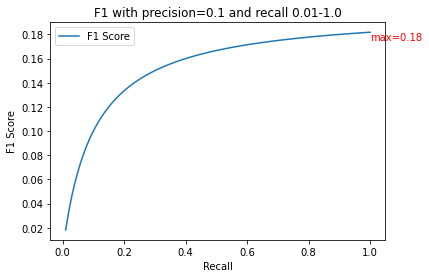

In [35]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=0.1 and recall 0.01-1.0", print_max_y=True)

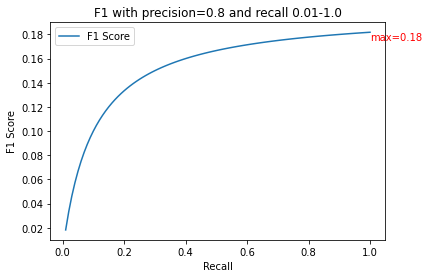

In [36]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=0.8 and recall 0.01-1.0", print_max_y=True)

In [37]:
max(f1_scores)

0.18181818181818182

In [38]:
f1_scores = []
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(0.1,r))

In [39]:
values = [(0.1, round(x,2), round(f1(0.1, x), 5), round(f1(0.1, x)-x, 5)) for x in np.arange(0.1, 1.1, 0.1)]
pd.DataFrame(columns=["Precision", "Recall", "F1-Score", "Difference"], data=values)

,Precision,Recall,F1-Score,Difference
0,0.1,0.1,0.10000,0.00000
1,0.1,0.2,0.13333,-0.06667
2,0.1,0.3,0.15000,-0.15000
3,0.1,0.4,0.16000,-0.24000
4,0.1,0.5,0.16667,-0.33333
5,0.1,0.6,0.17143,-0.42857
6,0.1,0.7,0.17500,-0.52500
7,0.1,0.8,0.17778,-0.62222
8,0.1,0.9,0.18000,-0.72000
9,0.1,1.0,0.18182,-0.81818


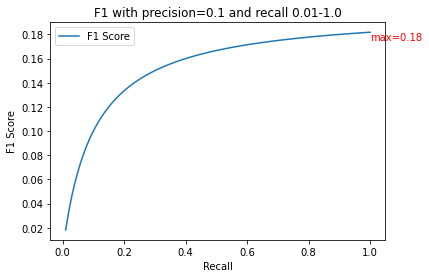

In [40]:
plot_scores("Recall", "F1 Score", recalls, f1_scores, "F1 with precision=0.1 and recall 0.01-1.0", print_max_y=True)

In [41]:
f1_scores = []
for p in precisions:
    p_scores = []
    for r in recalls:
        p_scores.append(f1(p,r))
    f1_scores.append(max(p_scores))

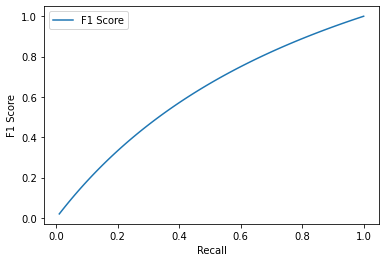

In [42]:
plt.plot(recalls, f1_scores) #params are (x,y) 
plt.xlabel("Recall") 
plt.ylabel("F1 Score") 
plt.legend(("F1 Score",), loc='best') 
plt.show()

| Label | Precision | Recall | FScore | Support |
|-------|-----------|--------|--------|---------|
| 1     | 94%       | 83%    | 0.88   | 204     |
| 2     | 71%       | 50%    | 0.54   | 127     |
| ...   | ...       | ...    | ...    | ...     |
| 4     | 80%       | 98%    | 0.89   | 838     |
| 5     | 93%       | 81%    | 0.91   | 1190    |

In [43]:
#https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
f1_scores = []
precisions = [0.94, 0.71, 0.80, 0.93]
recalls =    [0.83, 0.50, 0.98, 0.81]
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(p,r))
f1_scores

[0.8815819209039547,
 0.5867768595041322,
 0.8808988764044944,
 0.8658620689655172]

             precision    recall  f1-score   support

          0       0.65      1.00      0.79        17
          1       0.57      0.75      0.65        16
          2       0.33      0.06      0.10        17
avg / total       0.52      0.60      0.51        50

In [44]:
#https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
f1_scores = []
precisions = [0.65, 0.57, 0.33]
recalls =    [1.00, 0.75, 0.06]
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(p,r))
f1_scores

[0.787878787878788, 0.6477272727272728, 0.10153846153846155]

https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

In [45]:
f1(0.836576, 0.853175)

0.8447939711827364

In [46]:
f1(0.5, 0.5)

0.5

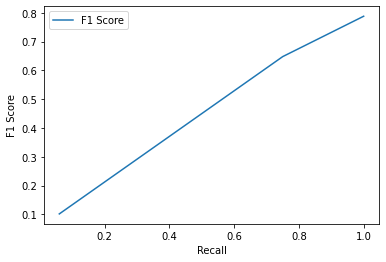

In [47]:
plt.plot(recalls, f1_scores) #params are (x,y) 
plt.xlabel("Recall") 
plt.ylabel("F1 Score") 
plt.legend(("F1 Score",), loc='best') 
plt.show()

| Label | Precision | Recall | FScore | Support |
|-------|-----------|--------|--------|---------|
| 1     | 94%       | 83%    | 0.88   | 204     |
| 2     | 71%       | 50%    | 0.54   | 127     |
| ...   | ...       | ...    | ...    | ...     |
| 4     | 80%       | 98%    | 0.89   | 838     |
| 5     | 93%       | 81%    | 0.91   | 1190    |

In [48]:
#https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
f1_scores = []
precisions = [0.94, 0.71, 0.80, 0.93]
recalls =    [0.83, 0.50, 0.98, 0.81]
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(p,r))
f1_scores

[0.8815819209039547,
 0.5867768595041322,
 0.8808988764044944,
 0.8658620689655172]

             precision    recall  f1-score   support

          0       0.65      1.00      0.79        17
          1       0.57      0.75      0.65        16
          2       0.33      0.06      0.10        17
avg / total       0.52      0.60      0.51        50

In [49]:
#https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
f1_scores = []
precisions = [0.65, 0.57, 0.33]
recalls =    [1.00, 0.75, 0.06]
for (p, r) in zip (precisions, recalls):
    f1_scores.append(f1(p,r))
f1_scores

[0.787878787878788, 0.6477272727272728, 0.10153846153846155]

https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

In [50]:
f1(0.836576, 0.853175)

0.8447939711827364

In [51]:
f1(0.5, 0.5)

0.5

In [52]:
cancer = np.random.uniform(low=0.0, high=1.0, size=(500,))

In [53]:
cancer_onehot = cancer > 0.5

In [54]:
sum(cancer_onehot)

218

In [55]:
len(cancer_onehot)-sum(cancer_onehot)

282

In [56]:
f1(0.5, 0.5)

0.5

In [57]:
cancer = np.random.uniform(low=0.0, high=1.0, size=(500,))

In [58]:
cancer_onehot = cancer > 0.5

In [59]:
sum(cancer_onehot)

257

In [60]:
len(cancer_onehot)-sum(cancer_onehot)

243

In [61]:
#data has 100 instances, 90/10 split
#TN,TP,FN,FP
data = [(90, 0, 10, 0, "predict all negative"), #predict all negative
        (0, 10, 0, 90, "predict all positive"), 
        (90, 10, 0, 0, "predict 100% correct"), #predict 100% correct
        (80, 10, 0, 10, "predict 10 negative wrong, rest (90) correct"), #predict 10 negative wrong, rest (90) correct
        (50, 0, 10, 40, "predict 50% correct (only negatives), 50% wrong (including all positives)"), #predict 50% correct (only negatives), 50% wrong (including all positives)
        (90, 1, 9, 0, "predict all negatives and 1/10 positives correct"), #predict all negatives and 1/10 positives correct
        (90, 2, 8, 0, "predict all negatives and 2/10 positives correct"), #predict all negatives and 2/10 positives correct
        (90, 3, 7, 0, "predict all negatives and 3/10 positives correct"), #predict all negatives and 3/10 positives correct
        (80, 0, 10, 10, "predict all positives and 10/90 negatives wrong"), #predict all positives and 10/90 negatives wrong
        (80, 1, 9, 10, "predict 9/10 positives and 10/90 negatives wrong"), #predict 9/10 positives and 10/90 negatives wrong
        (80, 2, 8, 10, "predict 8/10 positives and 10/90 negatives wrong"), #predict 8/10 positives and 10/90 negatives wrong
        (80, 3, 7, 10, "predict 7/10 positives and 10/90 negatives wrong"), #predict 7/10 positives and 10/90 negatives wrong
       ]

In [62]:
df = pd.DataFrame(columns=["TN", "TP", "FN", "FP", "Description"], data=data)
df

,TN,TP,FN,FP,Description
0,90,0,10,0,predict all negative
1,0,10,0,90,predict all positive
2,90,10,0,0,predict 100% correct
3,80,10,0,10,"predict 10 negative wrong, rest (90) correct"
4,50,0,10,40,"predict 50% correct (only negatives), 50% wron..."
5,90,1,9,0,predict all negatives and 1/10 positives correct
6,90,2,8,0,predict all negatives and 2/10 positives correct
7,90,3,7,0,predict all negatives and 3/10 positives correct
8,80,0,10,10,predict all positives and 10/90 negatives wrong
9,80,1,9,10,predict 9/10 positives and 10/90 negatives wrong


In [63]:
def precision(tp, fp):
    div = tp+fp
    if div == 0:
        return np.nan
    return tp/div

In [64]:
precision(data[0][1], data[0][3])

nan

In [65]:
def recall(tp, fn):
    return tp/(tp+fn)

In [66]:
recall(data[0][1], data[0][2])

0.0

In [67]:
f1_scores = []
for idx, row in enumerate(data):
    p = precision(row[1], row[3])
    r = recall(row[1], row[2])
    print(f"{idx}: {p}, {r}")
    f1_score = f1(p, r)
    f1_scores.append(f1_score)

0: nan, 0.0
1: 0.1, 1.0
2: 1.0, 1.0
3: 0.5, 1.0
4: 0.0, 0.0
5: 1.0, 0.1
6: 1.0, 0.2
7: 1.0, 0.3
8: 0.0, 0.0
9: 0.09090909090909091, 0.1
10: 0.16666666666666666, 0.2
11: 0.23076923076923078, 0.3


In [68]:
f1_scores

[nan,
 0.18181818181818182,
 1.0,
 0.6666666666666666,
 nan,
 0.18181818181818182,
 0.33333333333333337,
 0.4615384615384615,
 nan,
 0.09523809523809525,
 0.1818181818181818,
 0.2608695652173913]

In [69]:
df["F1"]=f1_scores
df

,TN,TP,FN,FP,Description,F1
0,90,0,10,0,predict all negative,NaN
1,0,10,0,90,predict all positive,0.181818
2,90,10,0,0,predict 100% correct,1.000000
3,80,10,0,10,"predict 10 negative wrong, rest (90) correct",0.666667
4,50,0,10,40,"predict 50% correct (only negatives), 50% wron...",NaN
5,90,1,9,0,predict all negatives and 1/10 positives correct,0.181818
6,90,2,8,0,predict all negatives and 2/10 positives correct,0.333333
7,90,3,7,0,predict all negatives and 3/10 positives correct,0.461538
8,80,0,10,10,predict all positives and 10/90 negatives wrong,NaN
9,80,1,9,10,predict 9/10 positives and 10/90 negatives wrong,0.095238


In [70]:
def acc(TN, TP, FN, FP):
    return (TP + TN)/(TP + TN + FP + FN)

In [71]:
accuracies = [acc(row[0], row[1], row[2], row[3]) for row in data]
accuracies

[0.9, 0.1, 1.0, 0.9, 0.5, 0.91, 0.92, 0.93, 0.8, 0.81, 0.82, 0.83]

In [72]:
df["ACC"] = accuracies

In [73]:
df

,TN,TP,FN,FP,Description,F1,ACC
0,90,0,10,0,predict all negative,NaN,0.90
1,0,10,0,90,predict all positive,0.181818,0.10
2,90,10,0,0,predict 100% correct,1.000000,1.00
3,80,10,0,10,"predict 10 negative wrong, rest (90) correct",0.666667,0.90
4,50,0,10,40,"predict 50% correct (only negatives), 50% wron...",NaN,0.50
5,90,1,9,0,predict all negatives and 1/10 positives correct,0.181818,0.91
6,90,2,8,0,predict all negatives and 2/10 positives correct,0.333333,0.92
7,90,3,7,0,predict all negatives and 3/10 positives correct,0.461538,0.93
8,80,0,10,10,predict all positives and 10/90 negatives wrong,NaN,0.80
9,80,1,9,10,predict 9/10 positives and 10/90 negatives wrong,0.095238,0.81


In [74]:
df = df[["TN", "TP", "FN", "FP", "F1", "ACC", "Description"]]

In [75]:
#https://stackoverflow.com/questions/17232013/how-to-set-the-pandas-dataframe-data-left-right-alignment
df.style.set_properties(subset=["Description"], **{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])


,TN,TP,FN,FP,F1,ACC,Description
0,90,0,10,0,nan,0.900000,predict all negative
1,0,10,0,90,0.181818,0.100000,predict all positive
2,90,10,0,0,1.000000,1.000000,predict 100% correct
3,80,10,0,10,0.666667,0.900000,"predict 10 negative wrong, rest (90) correct"
4,50,0,10,40,nan,0.500000,"predict 50% correct (only negatives), 50% wrong (including all positives)"
5,90,1,9,0,0.181818,0.910000,predict all negatives and 1/10 positives correct
6,90,2,8,0,0.333333,0.920000,predict all negatives and 2/10 positives correct
7,90,3,7,0,0.461538,0.930000,predict all negatives and 3/10 positives correct
8,80,0,10,10,nan,0.800000,predict all positives and 10/90 negatives wrong
9,80,1,9,10,0.095238,0.810000,predict 9/10 positives and 10/90 negatives wrong


In [76]:
#50/50 split

In [77]:
#data has 100 instances, 50/50 split
#TN,TP,FN,FP
data = [(50, 0, 50, 0, "predict all negative"), #predict all negative
        (0, 50, 0, 50, "predict all positive"), 
        (50, 50, 0, 0, "predict 100% correct"), #predict 100% correct
        (40, 50, 0, 10, "predict 10 negative wrong, rest (90) correct"), #predict 10 negative wrong, rest (90) correct
        (50, 0, 50, 0, "predict 50% correct (all negatives), 50% wrong (all positives)"), #predict 50% correct (all negatives), 50% wrong (all positives)
        (50, 1, 49, 0, "predict all negatives and 1/50 positives correct"), #predict all negatives and 1/50 positives correct
        (50, 2, 48, 0, "predict all negatives and 2/50 positives correct"), #predict all negatives and 2/50 positives correct
        (50, 3, 47, 0, "predict all negatives and 3/50 positives correct"), #predict all negatives and 3/50 positives correct
        (40, 0, 50, 10, "predict all positives and 10/90 negatives wrong"), #predict all positives and 10/90 negatives wrong
        (40, 1, 49, 10, "predict 9/10 positives and 10/90 negatives wrong"), #predict 9/10 positives and 10/90 negatives wrong
        (40, 2, 48, 10, "predict 8/10 positives and 10/90 negatives wrong"), #predict 8/10 positives and 10/90 negatives wrong
        (40, 3, 47, 10, "predict 7/10 positives and 10/90 negatives wrong"), #predict 7/10 positives and 10/90 negatives wrong
       ]

In [78]:
f1_scores = []
for idx, row in enumerate(data):
    p = precision(row[1], row[3])
    r = recall(row[1], row[2])
    print(f"{idx}: {p}, {r}")
    f1_score = f1(p, r)
    f1_scores.append(f1_score)

0: nan, 0.0
1: 0.5, 1.0
2: 1.0, 1.0
3: 0.8333333333333334, 1.0
4: nan, 0.0
5: 1.0, 0.02
6: 1.0, 0.04
7: 1.0, 0.06
8: 0.0, 0.0
9: 0.09090909090909091, 0.02
10: 0.16666666666666666, 0.04
11: 0.23076923076923078, 0.06


In [79]:
df = pd.DataFrame(columns=["TN", "TP", "FN", "FP", "Description"], data=data)
df

,TN,TP,FN,FP,Description
0,50,0,50,0,predict all negative
1,0,50,0,50,predict all positive
2,50,50,0,0,predict 100% correct
3,40,50,0,10,"predict 10 negative wrong, rest (90) correct"
4,50,0,50,0,"predict 50% correct (all negatives), 50% wrong..."
5,50,1,49,0,predict all negatives and 1/50 positives correct
6,50,2,48,0,predict all negatives and 2/50 positives correct
7,50,3,47,0,predict all negatives and 3/50 positives correct
8,40,0,50,10,predict all positives and 10/90 negatives wrong
9,40,1,49,10,predict 9/10 positives and 10/90 negatives wrong


In [80]:
df["F1"]=f1_scores

In [81]:
accuracies = [acc(row[0], row[1], row[2], row[3]) for row in data]
accuracies

[0.5, 0.5, 1.0, 0.9, 0.5, 0.51, 0.52, 0.53, 0.4, 0.41, 0.42, 0.43]

In [82]:
df["ACC"] = accuracies

In [83]:
df

,TN,TP,FN,FP,Description,F1,ACC
0,50,0,50,0,predict all negative,NaN,0.50
1,0,50,0,50,predict all positive,0.666667,0.50
2,50,50,0,0,predict 100% correct,1.000000,1.00
3,40,50,0,10,"predict 10 negative wrong, rest (90) correct",0.909091,0.90
4,50,0,50,0,"predict 50% correct (all negatives), 50% wrong...",NaN,0.50
5,50,1,49,0,predict all negatives and 1/50 positives correct,0.039216,0.51
6,50,2,48,0,predict all negatives and 2/50 positives correct,0.076923,0.52
7,50,3,47,0,predict all negatives and 3/50 positives correct,0.113208,0.53
8,40,0,50,10,predict all positives and 10/90 negatives wrong,NaN,0.40
9,40,1,49,10,predict 9/10 positives and 10/90 negatives wrong,0.032787,0.41


In [84]:
df = df[["TN", "TP", "FN", "FP", "F1", "ACC", "Description"]]

In [85]:
#https://stackoverflow.com/questions/17232013/how-to-set-the-pandas-dataframe-data-left-right-alignment
df.style.set_properties(subset=["Description"], **{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])


,TN,TP,FN,FP,F1,ACC,Description
0,50,0,50,0,nan,0.500000,predict all negative
1,0,50,0,50,0.666667,0.500000,predict all positive
2,50,50,0,0,1.000000,1.000000,predict 100% correct
3,40,50,0,10,0.909091,0.900000,"predict 10 negative wrong, rest (90) correct"
4,50,0,50,0,nan,0.500000,"predict 50% correct (all negatives), 50% wrong (all positives)"
5,50,1,49,0,0.039216,0.510000,predict all negatives and 1/50 positives correct
6,50,2,48,0,0.076923,0.520000,predict all negatives and 2/50 positives correct
7,50,3,47,0,0.113208,0.530000,predict all negatives and 3/50 positives correct
8,40,0,50,10,nan,0.400000,predict all positives and 10/90 negatives wrong
9,40,1,49,10,0.032787,0.410000,predict 9/10 positives and 10/90 negatives wrong


In [86]:
#data has 100 instances, 90/10 split
#TN,TP,FN,FP
data = [(90, 0, 10, 0, "predict all negative"), #predict all negative
        (0, 10, 0, 90, "predict all positive"), 
        (90, 10, 0, 0, "predict 100% correct"), #predict 100% correct
        (80, 10, 0, 10, "predict 10 negative wrong, rest (90) correct"), #predict 10 negative wrong, rest (90) correct
        (50, 0, 10, 40, "predict 50% correct (only negatives), 50% wrong (including all positives)"), #predict 50% correct (only negatives), 50% wrong (including all positives)
        (90, 1, 9, 0, "predict all negatives and 1/10 positives correct"), #predict all negatives and 1/10 positives correct
        (90, 2, 8, 0, "predict all negatives and 2/10 positives correct"), #predict all negatives and 2/10 positives correct
        (90, 3, 7, 0, "predict all negatives and 3/10 positives correct"), #predict all negatives and 3/10 positives correct
        (80, 0, 10, 10, "predict all positives and 10/90 negatives wrong"), #predict all positives and 10/90 negatives wrong
        (80, 1, 9, 10, "predict 9/10 positives and 10/90 negatives wrong"), #predict 9/10 positives and 10/90 negatives wrong
        (80, 2, 8, 10, "predict 8/10 positives and 10/90 negatives wrong"), #predict 8/10 positives and 10/90 negatives wrong
        (80, 3, 7, 10, "predict 7/10 positives and 10/90 negatives wrong"), #predict 7/10 positives and 10/90 negatives wrong
       ]

In [87]:
# reverse split
#data has 100 instances, 90/10 split
#TP,TN,FP,FN
data = [(0, 10, 0, 90, "predict all negative"),
        (90, 0, 10, 0, "predict all positive"), 
        (90, 10, 0, 0, "predict 100% correct"),
        (80, 10, 0, 10, "predict 10 positive wrong, rest (90) correct"),
        (50, 0, 10, 40, "predict 50% correct (only positives), 50% wrong (including all negatives)"),
        (90, 1, 9, 0, "predict all positives and 1/10 negatives correct"),
        (90, 2, 8, 0, "predict all positives and 2/10 negatives correct"), #predict all negatives and 2/10 positives correct
        (90, 3, 7, 0, "predict all positives and 3/10 negatives correct"), #predict all negatives and 3/10 positives correct
        (80, 0, 10, 10, "predict all negatives and 10/90 positives wrong"), #predict all positives and 10/90 negatives wrong
        (80, 1, 9, 10, "predict 9/10 negatives and 10/90 positives wrong"), #predict 9/10 positives and 10/90 negatives wrong
        (80, 2, 8, 10, "predict 8/10 negatives and 10/90 positives wrong"), #predict 8/10 positives and 10/90 negatives wrong
        (80, 3, 7, 10, "predict 7/10 negatives and 10/90 positives wrong"), #predict 7/10 positives and 10/90 negatives wrong
       ]

In [88]:
f1_scores = []
for idx, row in enumerate(data):
    p = precision(row[0], row[2])
    r = recall(row[0], row[3])
    print(f"{idx}: {p}, {r}")
    f1_score = f1(p, r)
    f1_scores.append(f1_score)

0: nan, 0.0
1: 0.9, 1.0
2: 1.0, 1.0
3: 1.0, 0.8888888888888888
4: 0.8333333333333334, 0.5555555555555556
5: 0.9090909090909091, 1.0
6: 0.9183673469387755, 1.0
7: 0.9278350515463918, 1.0
8: 0.8888888888888888, 0.8888888888888888
9: 0.898876404494382, 0.8888888888888888
10: 0.9090909090909091, 0.8888888888888888
11: 0.9195402298850575, 0.8888888888888888


In [89]:
accuracies = [acc(row[0], row[1], row[2], row[3]) for row in data]
accuracies

[0.1, 0.9, 1.0, 0.9, 0.5, 0.91, 0.92, 0.93, 0.8, 0.81, 0.82, 0.83]

In [90]:
df = pd.DataFrame(columns=["TP", "TN", "FP", "FN", "Description"], data=data)
df

,TP,TN,FP,FN,Description
0,0,10,0,90,predict all negative
1,90,0,10,0,predict all positive
2,90,10,0,0,predict 100% correct
3,80,10,0,10,"predict 10 positive wrong, rest (90) correct"
4,50,0,10,40,"predict 50% correct (only positives), 50% wron..."
5,90,1,9,0,predict all positives and 1/10 negatives correct
6,90,2,8,0,predict all positives and 2/10 negatives correct
7,90,3,7,0,predict all positives and 3/10 negatives correct
8,80,0,10,10,predict all negatives and 10/90 positives wrong
9,80,1,9,10,predict 9/10 negatives and 10/90 positives wrong


In [91]:
df["F1"]=f1_scores

In [92]:
df["ACC"] = accuracies

In [93]:
df

,TP,TN,FP,FN,Description,F1,ACC
0,0,10,0,90,predict all negative,NaN,0.10
1,90,0,10,0,predict all positive,0.947368,0.90
2,90,10,0,0,predict 100% correct,1.000000,1.00
3,80,10,0,10,"predict 10 positive wrong, rest (90) correct",0.941176,0.90
4,50,0,10,40,"predict 50% correct (only positives), 50% wron...",0.666667,0.50
5,90,1,9,0,predict all positives and 1/10 negatives correct,0.952381,0.91
6,90,2,8,0,predict all positives and 2/10 negatives correct,0.957447,0.92
7,90,3,7,0,predict all positives and 3/10 negatives correct,0.962567,0.93
8,80,0,10,10,predict all negatives and 10/90 positives wrong,0.888889,0.80
9,80,1,9,10,predict 9/10 negatives and 10/90 positives wrong,0.893855,0.81


In [94]:
df = df[["TN", "TP", "FN", "FP", "F1", "ACC", "Description"]]

In [95]:
#https://stackoverflow.com/questions/17232013/how-to-set-the-pandas-dataframe-data-left-right-alignment
df.style.set_properties(subset=["Description"], **{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])


,TN,TP,FN,FP,F1,ACC,Description
0,10,0,90,0,nan,0.100000,predict all negative
1,0,90,0,10,0.947368,0.900000,predict all positive
2,10,90,0,0,1.000000,1.000000,predict 100% correct
3,10,80,10,0,0.941176,0.900000,"predict 10 positive wrong, rest (90) correct"
4,0,50,40,10,0.666667,0.500000,"predict 50% correct (only positives), 50% wrong (including all negatives)"
5,1,90,0,9,0.952381,0.910000,predict all positives and 1/10 negatives correct
6,2,90,0,8,0.957447,0.920000,predict all positives and 2/10 negatives correct
7,3,90,0,7,0.962567,0.930000,predict all positives and 3/10 negatives correct
8,0,80,10,10,0.888889,0.800000,predict all negatives and 10/90 positives wrong
9,1,80,10,9,0.893855,0.810000,predict 9/10 negatives and 10/90 positives wrong


In [96]:
f1(p=0.714, r=0.789)

0.74962874251497

In [97]:
f1(p=0.01, r=1.0)

0.019801980198019802

In [98]:
precisions

[0.65, 0.57, 0.33]

In [99]:
df["ACC"] = accuracies

In [100]:
df

,TN,TP,FN,FP,F1,ACC,Description
0,10,0,90,0,NaN,0.10,predict all negative
1,0,90,0,10,0.947368,0.90,predict all positive
2,10,90,0,0,1.000000,1.00,predict 100% correct
3,10,80,10,0,0.941176,0.90,"predict 10 positive wrong, rest (90) correct"
4,0,50,40,10,0.666667,0.50,"predict 50% correct (only positives), 50% wron..."
5,1,90,0,9,0.952381,0.91,predict all positives and 1/10 negatives correct
6,2,90,0,8,0.957447,0.92,predict all positives and 2/10 negatives correct
7,3,90,0,7,0.962567,0.93,predict all positives and 3/10 negatives correct
8,0,80,10,10,0.888889,0.80,predict all negatives and 10/90 positives wrong
9,1,80,10,9,0.893855,0.81,predict 9/10 negatives and 10/90 positives wrong


In [101]:
df = df[["TN", "TP", "FN", "FP", "F1", "ACC", "Description"]]

In [102]:
#https://stackoverflow.com/questions/17232013/how-to-set-the-pandas-dataframe-data-left-right-alignment
df.style.set_properties(subset=["Description"], **{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])


,TN,TP,FN,FP,F1,ACC,Description
0,10,0,90,0,nan,0.100000,predict all negative
1,0,90,0,10,0.947368,0.900000,predict all positive
2,10,90,0,0,1.000000,1.000000,predict 100% correct
3,10,80,10,0,0.941176,0.900000,"predict 10 positive wrong, rest (90) correct"
4,0,50,40,10,0.666667,0.500000,"predict 50% correct (only positives), 50% wrong (including all negatives)"
5,1,90,0,9,0.952381,0.910000,predict all positives and 1/10 negatives correct
6,2,90,0,8,0.957447,0.920000,predict all positives and 2/10 negatives correct
7,3,90,0,7,0.962567,0.930000,predict all positives and 3/10 negatives correct
8,0,80,10,10,0.888889,0.800000,predict all negatives and 10/90 positives wrong
9,1,80,10,9,0.893855,0.810000,predict 9/10 negatives and 10/90 positives wrong


In [117]:
# reverse split
#data has 100 instances, 90/10 split
#TP,TN,FP,FN
data = [(0, 10, 0, 90, "predict all negative"),
        (90, 0, 10, 0, "predict all positive"), 
        (90, 10, 0, 0, "predict 100% correct"),
        (80, 10, 0, 10, "predict 10 positive wrong, rest (90) correct"),
        (50, 0, 10, 40, "predict 50% correct (only positives), 50% wrong (including all negatives)"),
        (90, 1, 9, 0, "predict all positives and 1/10 negatives correct"),
        (90, 2, 8, 0, "predict all positives and 2/10 negatives correct"), #predict all negatives and 2/10 positives correct
        (90, 3, 7, 0, "predict all positives and 3/10 negatives correct"), #predict all negatives and 3/10 positives correct
        (80, 0, 10, 10, "predict all negatives and 10/90 positives wrong"), #predict all positives and 10/90 negatives wrong
        (80, 1, 9, 10, "predict 9/10 negatives and 10/90 positives wrong"), #predict 9/10 positives and 10/90 negatives wrong
        (80, 2, 8, 10, "predict 8/10 negatives and 10/90 positives wrong"), #predict 8/10 positives and 10/90 negatives wrong
        (80, 3, 7, 10, "predict 7/10 negatives and 10/90 positives wrong"), #predict 7/10 positives and 10/90 negatives wrong
       ]

In [118]:
f1_scores = []
for idx, row in enumerate(data):
    p = precision(row[0], row[2])
    r = recall(row[0], row[3])
    print(f"{idx}: {p}, {r}")
    f1_score = f1(p, r)
    f1_scores.append(f1_score)

0: nan, 0.0
1: 0.9, 1.0
2: 1.0, 1.0
3: 1.0, 0.8888888888888888
4: 0.8333333333333334, 0.5555555555555556
5: 0.9090909090909091, 1.0
6: 0.9183673469387755, 1.0
7: 0.9278350515463918, 1.0
8: 0.8888888888888888, 0.8888888888888888
9: 0.898876404494382, 0.8888888888888888
10: 0.9090909090909091, 0.8888888888888888
11: 0.9195402298850575, 0.8888888888888888


In [119]:
accuracies = [acc(row[0], row[1], row[2], row[3]) for row in data]
accuracies

[0.1, 0.9, 1.0, 0.9, 0.5, 0.91, 0.92, 0.93, 0.8, 0.81, 0.82, 0.83]

In [120]:
df = pd.DataFrame(columns=["TP","TN","FP","FN", "Description"], data=data)
df

,TP,TN,FP,FN,Description
0,0,10,0,90,predict all negative
1,90,0,10,0,predict all positive
2,90,10,0,0,predict 100% correct
3,80,10,0,10,"predict 10 positive wrong, rest (90) correct"
4,50,0,10,40,"predict 50% correct (only positives), 50% wron..."
5,90,1,9,0,predict all positives and 1/10 negatives correct
6,90,2,8,0,predict all positives and 2/10 negatives correct
7,90,3,7,0,predict all positives and 3/10 negatives correct
8,80,0,10,10,predict all negatives and 10/90 positives wrong
9,80,1,9,10,predict 9/10 negatives and 10/90 positives wrong


In [121]:
df["F1"]=f1_scores

In [122]:
df["ACC"] = accuracies

In [123]:
df

,TP,TN,FP,FN,Description,F1,ACC
0,0,10,0,90,predict all negative,NaN,0.10
1,90,0,10,0,predict all positive,0.947368,0.90
2,90,10,0,0,predict 100% correct,1.000000,1.00
3,80,10,0,10,"predict 10 positive wrong, rest (90) correct",0.941176,0.90
4,50,0,10,40,"predict 50% correct (only positives), 50% wron...",0.666667,0.50
5,90,1,9,0,predict all positives and 1/10 negatives correct,0.952381,0.91
6,90,2,8,0,predict all positives and 2/10 negatives correct,0.957447,0.92
7,90,3,7,0,predict all positives and 3/10 negatives correct,0.962567,0.93
8,80,0,10,10,predict all negatives and 10/90 positives wrong,0.888889,0.80
9,80,1,9,10,predict 9/10 negatives and 10/90 positives wrong,0.893855,0.81


In [124]:
df = df[["TN", "TP", "FN", "FP", "F1", "ACC", "Description"]]

In [125]:
#https://stackoverflow.com/questions/17232013/how-to-set-the-pandas-dataframe-data-left-right-alignment
df.style.set_properties(subset=["Description"], **{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])


,TN,TP,FN,FP,F1,ACC,Description
0,10,0,90,0,nan,0.100000,predict all negative
1,0,90,0,10,0.947368,0.900000,predict all positive
2,10,90,0,0,1.000000,1.000000,predict 100% correct
3,10,80,10,0,0.941176,0.900000,"predict 10 positive wrong, rest (90) correct"
4,0,50,40,10,0.666667,0.500000,"predict 50% correct (only positives), 50% wrong (including all negatives)"
5,1,90,0,9,0.952381,0.910000,predict all positives and 1/10 negatives correct
6,2,90,0,8,0.957447,0.920000,predict all positives and 2/10 negatives correct
7,3,90,0,7,0.962567,0.930000,predict all positives and 3/10 negatives correct
8,0,80,10,10,0.888889,0.800000,predict all negatives and 10/90 positives wrong
9,1,80,10,9,0.893855,0.810000,predict 9/10 negatives and 10/90 positives wrong


In [126]:
f1(p=0.714, r=0.789)

0.74962874251497

In [ ]:
f1(p=0.01, r=1.0)

In [ ]:
precisions

In [ ]:
precision(tp=0, fp=0.4)

In [ ]:
recall(tp=0, fn=0.1)

0.019801980198019802

In [128]:
precisions

[0.65, 0.57, 0.33]

In [130]:
precision(tp=0, fp=0.4)

0.0

In [131]:
recall(tp=0, fn=0.1)

0.0